# **Sentiment Analysis of Solo Leveling Games in Indonesia**

In this project, we will discuss sentiment analysis carried out on the game which was just released on May 8 2024, Solo Leveling. In the process, comments or reviews are obtained through scrapping on Google Play. Followed by data cleaning, labeling and analysis

# **Scrapping**

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [2]:
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np

In [6]:
hasil, continuation_token = reviews(
    'com.netmarble.sololv',
    lang='id', #bahasa Indonesia
    country='id', #Indonesia
    sort=Sort.MOST_RELEVANT, #sorting data
    count=10000, #how many data
    filter_score_with=None #rating
)

In [8]:
data = pd.DataFrame(np.array(hasil),columns=['ulasan'])
data = data.join(pd.DataFrame(data.pop('ulasan').tolist()))
data.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,176df1ea-e303-4311-b641-3b1e37f32a1a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk tombol penargetan sangat buruk, angel ca...",2,12,1.1.47,2024-08-09 11:49:08,None,NaT,1.1.47
1,78c33f36-7401-4c5d-b932-3506eda0b1ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bug yang paling mengganggu banget adalah bug l...,2,53,1.1.45,2024-07-31 23:27:58,None,NaT,1.1.45
2,64a79fe7-73ab-44dd-8de2-2354fc241038,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk grafik karakter semuanya udah bagus kecu...,4,7,1.1.47,2024-08-14 09:35:41,None,NaT,1.1.47
3,fad2fb6b-b729-4262-b5f9-828fcd5bec8d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gameplaynya bagus! Walaupun banyak yang mengel...,4,3,1.1.47,2024-08-17 13:45:32,None,NaT,1.1.47


In [9]:
len(data)

10000

In [11]:
data = data[['content','score']]
data.head()

,content,score
0,"Untuk tombol penargetan sangat buruk, angel ca...",2
1,Bug yang paling mengganggu banget adalah bug l...,2
2,Untuk grafik karakter semuanya udah bagus kecu...,4
3,Gameplaynya bagus! Walaupun banyak yang mengel...,4
4,"Gamenya bagus, graphic bagus, skillnya keren2....",3


In [12]:
data.to_csv('ulasan_sololvl.csv', index = False, encoding='utf-8')

In [13]:
dataSololvl = pd.read_csv('/content/ulasan_sololvl.csv')
dataSololvl.head()

,content,score
0,"Untuk tombol penargetan sangat buruk, angel ca...",2
1,Bug yang paling mengganggu banget adalah bug l...,2
2,Untuk grafik karakter semuanya udah bagus kecu...,4
3,Gameplaynya bagus! Walaupun banyak yang mengel...,4
4,"Gamenya bagus, graphic bagus, skillnya keren2....",3


# **Data Cleaning**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [15]:
#Delete unnecessary data
data = dataSololvl.dropna()
data['clean_text'] = data['content'].str.replace('[^\w\s]','')
data['clean_text'] = data['content'].str.lower()
#Cleaning data with appropriate language
nltk.download('stopwords')
stop = stopwords.words('indonesian')
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


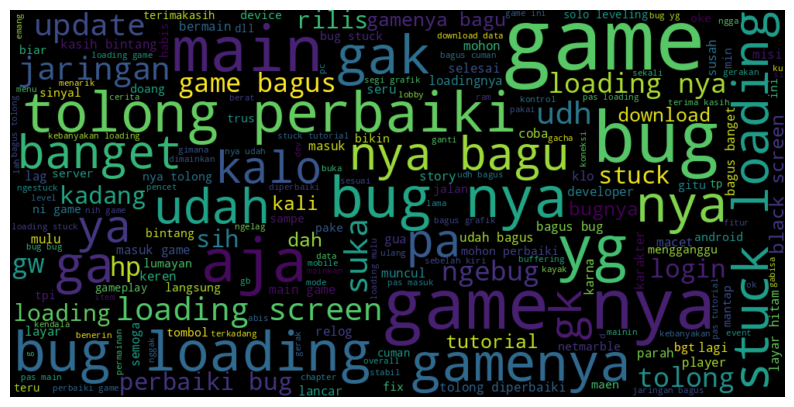

In [16]:
all_text = ' '.join([text for text in data['clean_text']])
wordcloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=110).generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#Update stop words to make more credible
stop_words = set(stopwords.words('indonesian'))
stop_words.update(['yg', 'dg', 'rt', 'dgn', 'ny', 'nya', 'di', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gk', 'gw', 'gak', 'ga', 'min', 'sy', 'saya'])

In [25]:
#Repeat the process until reliable
data['clean_text'] = data['content'].str.replace('[^\w\s]','')
data['clean_text'] = data['content'].str.lower()
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

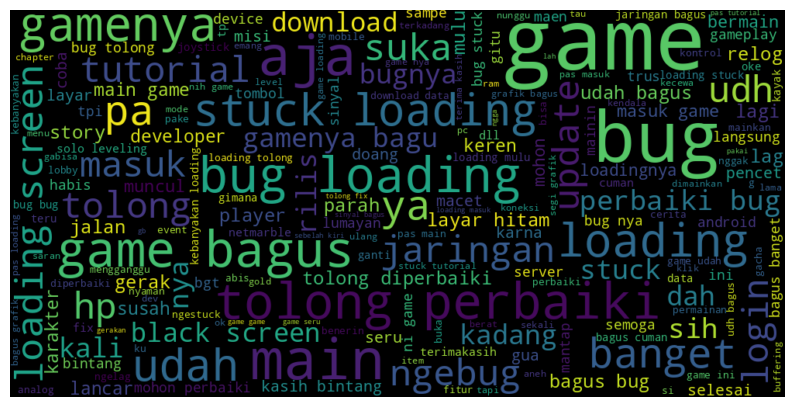

In [26]:
all_text = ' '.join([text for text in data['clean_text']])
wordcloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=110).generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Labeling**

In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer ()
#Create label or labeling
data['sentiment'] = data['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positif' if x > 0 else ('negatif' if x < 0 else 'netral'))

In [31]:
data[['content','sentiment_label']].head(10)

,content,sentiment_label
0,"Untuk tombol penargetan sangat buruk, angel ca...",negatif
1,Bug yang paling mengganggu banget adalah bug l...,negatif
2,Untuk grafik karakter semuanya udah bagus kecu...,netral
3,Gameplaynya bagus! Walaupun banyak yang mengel...,netral
4,"Gamenya bagus, graphic bagus, skillnya keren2....",positif
5,"Teruntuk developer, sayainta tolong perbaiki b...",netral
6,Dari segi gameplay sudah bagus dan event-event...,netral
7,"Masih banyak bug nya, setiap selesai kan gate,...",netral
8,Game udh bgus ada jln crita yg sru bgt. Tpi tl...,netral
9,Gamenya banyak bug di bagian loading screen ny...,netral


In [32]:
data.to_csv('label_ulasan_sololvl.csv', index = False, encoding='utf-8')

In [33]:
print(data['sentiment_label'].value_counts())

sentiment_label
netral     7036
negatif    1885
positif    1079
Name: count, dtype: int64


# **Analysis**

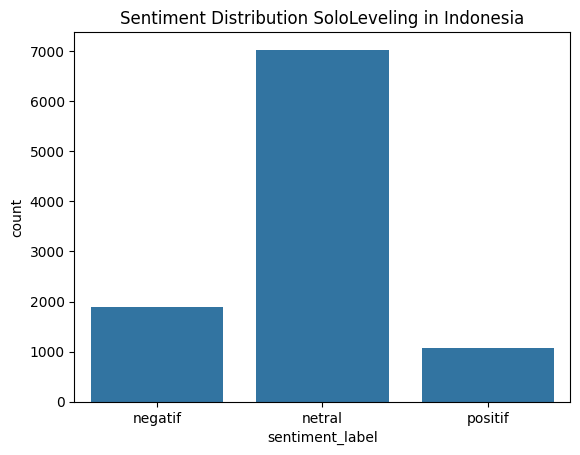

In [36]:
plt.title('Sentiment Distribution SoloLeveling in Indonesia')
sns.countplot(x='sentiment_label', data=data)
plt.show()

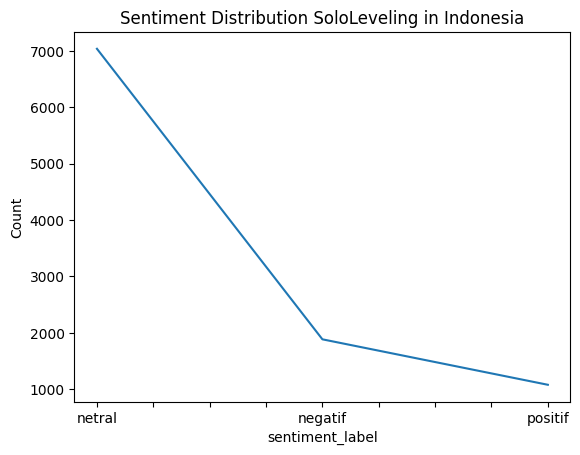

In [38]:
plt.title('Sentiment Distribution SoloLeveling in Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Count')
data['sentiment_label'].value_counts().plot(kind='line')
plt.show()

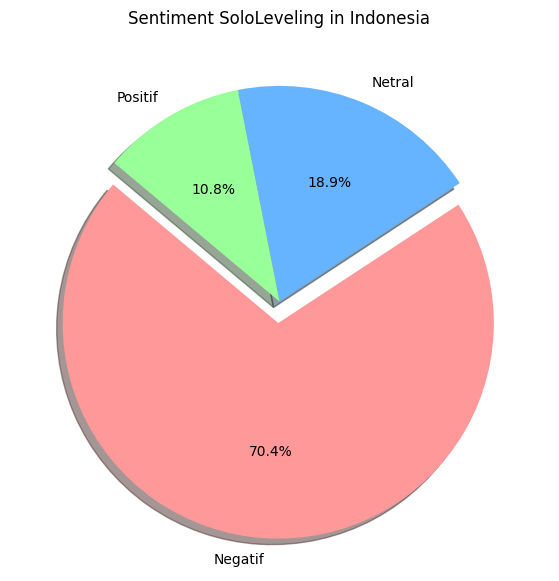

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
sizes = [count for count in data['sentiment_label'].value_counts()]
labels = ['Negatif', 'Netral', 'Positif']
explode = [0.1, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99']
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment SoloLeveling in Indonesia')
plt.show()

In [47]:
pd.set_option('display.max_colwidth', None)
positive_review = data[data['sentiment_label'] == 'positif']
positive_review = positive_review.sort_values(by='sentiment', ascending=False)
positive_review[['clean_text','sentiment','sentiment_label']].head(10)

,clean_text,sentiment,sentiment_label
172,"game bagus gacha jelek. gacha chae in alicia, hero lain, aneh. 60-70 + hero itupun hero dr rekruit biasa. habisin crystal aja. bagus top up. gacha hero . maaf uninstall stop langganan top up.",0.9413,positif
69,"gamenya bagus, loadingnya. nambah xp main seharian, ni susah nambah xp udh lev 45an, mengulang raid, nambah xp la, nunggu 1 nambah xp, nunggu kunci dungeon dlu, iya dikit2 beli. udah loadingnya banyak, menaikkan xp hunter ada, solusinya beli cepat nambah xp, jd da gunanya main seharian game ini, nunggu 1 dlu,",0.9274,positif
3009,"sumpah isinya sampah: -rate gacha jelek parah -misi dapetin tiket gacha susah -mision utama/cerita sulit level susah+gacha ampas -pas pendaftaran awal+as download reward deh 50rb kristal bintang diamon ya, dapet keuntungan daftar rilis -pay two win lu top up dapet rate gacha bagus reward lainya -ini game terburuk netmarble bagus ya seven knight itu.",0.9118,positif
60,"gamplay bagus hadiah pelit, 1. bug loading jalan 2. bug freeze loading suara game udah masuk pertarungan 3. bug hero tim aliansi muncul( 3 chara gameplay pakai 1/2) 4. bug bantuan pasukan bayangan hilang masuk gameplay 5. bug hero (misal 3 hero alicia semua) 6. bug loading layar hitam restart gameplay 7. bug masuk gameplay latarnya tembus character digerakkan dst",0.9001,positif
658,"gameplay menarik, adaptasi komik kesukaan orang, reward gacha mudah dapatkan, event tanggung² pedang ssr 2 kali game bonus hadiah menarik, mode jenuh menambah power tim kita. this is perfect game🤩🤩",0.8979,positif
3406,bos tolong masuk akal yaa coba rilis bos skill ngotak contoh cerberus serigala kembar. bos cerberus perbaiki buff skill nya. coba admin sendri lawan bos pake hero non counter pake hero counternya cuman 1 hero skill bertahan,0.8957,positif
1764,gameplay sih bagus gamenya pay to win. fitur free to play pay to play ya gitu vibe permainan rpg,0.8779,positif
2730,game si ok saran aja ni reward gate milih aja butuh exp gold game nyari gold seret 1 lg artefak/senjata tempa saran aja tumbal tempa artefak/senjata kesimpulannya 1.di gate pilih reward exp/gold 2.senjata/artefak udah tempa tumbal artefak/senjata,0.8625,positif
6874,"game bagus, tambahkan cerita novel tambahkan bonus - bonus",0.8519,positif
7511,keren pay to win free to play main,0.8442,positif


In [48]:
pd.set_option('display.max_colwidth', None)
positive_review = data[data['sentiment_label'] == 'negatif']
positive_review = positive_review.sort_values(by='sentiment', ascending=False)
positive_review[['clean_text','sentiment','sentiment_label']].head(10)

,clean_text,sentiment,sentiment_label
3218,udah bagus. saran tambahin chance senjata / character sr + perbaikan frame rate kadang suka drop,-0.0258,negatif
577,"mobile, setting kontrol otomatis layar sentuh, gamepad opsional, bug juga, stuck tutorial, re-login, segi grafik dll kendala, instal kendala diperbaiki ;)",-0.0258,negatif
922,versi android bug battlefield of trial dll tombol- tombol pencet game udah bagus update tolong perbaikan optimal,-0.0258,negatif
5829,game play keren 👍🏻 mantap dah lawan boss fight igris sulit tetep seru,-0.0516,negatif
677,"game bagus, bug, banyak² diperbaiki screen loading banget main bug stuck loading, sistem gacha pelit amat, stag raja power ngotak, 1 top up murahin dikit.. terimakasih",-0.0516,negatif
8022,"rilis mah loadingnya dikit, terusan update loadingnya parah bat anj, kadang"" fight loading, hapus aja dah apk play store, hp dah spek gacor aja loading, niat game hp, mending kasih khusus pc aja ktl",-0.0516,negatif
840,"gamenya, suruh download giga sih? 64gb kosong. memory 284mb bused kalahin game top aja. aneh developer mengecewakan kekecewaan player. bug, tutorial stuck.",-0.0516,negatif
1110,2 sementara.. stuck tutorial gakbisa gerak.. joystick dipencet.. dansaat lobby simbol mouse.. mempengaruhi performa.. mengganggu pemandangan,-0.0516,negatif
7502,game ya bagus kadang lag tetep gg moga gacha dapet bagus,-0.0516,negatif
2574,"buruan update, gimana orang top up bug suka stuck, sayang banget game bagus kualitas rendah",-0.0516,negatif
